In [3]:
import subprocess
import os
import time
import numpy as np
import open3d as o3d
import re




In [4]:
dataset = 'Dancer'
GoF = 5

In [8]:
input_dir = os.path.join(r'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\Data', os.path.join(dataset, 'meshes'))

output_root_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\encode_Draco', dataset)
print(input_dir)
print(output_root_dir)

G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\Data\Dancer\meshes
G:\PycharmProjects\Mesh_Editing\Results\encode_Draco\Dancer


## Encode

In [9]:
input_dir = os.path.join(r'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\Data', os.path.join(dataset, 'meshes'))
output_root_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\encode_Draco', dataset)

obj_files = [f for f in os.listdir(input_dir) if f.endswith('.obj')]

qps = range(0,15) # qp from 0 to 14, small qp (qp <=3 or 4) is meaningless

for qp in qps:
    output_dir = os.path.join(output_root_dir, f'{dataset}_qp_{qp}')
    os.makedirs(output_dir, exist_ok=True)

    output_file = os.path.join(output_dir, f'encoding_times_qp_{qp}.txt')
    with open(output_file, 'w') as f:
        total_encoding_time = 0
        for obj_file in obj_files:

            input_path = os.path.join(input_dir, obj_file)
            output_path = os.path.join(output_dir, obj_file.replace('.obj', f'_qp_{qp}.drc'))

            start_time = time.time()

            result = subprocess.run([
                            r'G:\Github\draco\build\Debug\draco_encoder',
                            '-i', input_path,
                            '-o', output_path,
                            '-qp', str(qp)
                            ], capture_output=True, text=True)
            print(result.stdout)
            end_time = time.time()

            encoding_time = end_time - start_time
            total_encoding_time += encoding_time
            print(f"Encoded {obj_file} in {encoding_time:.4f} seconds")
            f.write(f"Encoded {obj_file} in {encoding_time:.4f} seconds\n")

        total_files = len(obj_files)
        average_encoding_time = total_encoding_time / total_files

        f.write(f"\nTotal encoding time for qp {qp}: {total_encoding_time:.4f} seconds\n")
        f.write(f"Average encoding time for qp {qp}: {average_encoding_time:.4f} seconds\n\n")

Encoded dancer_fr0005.obj in 0.3218 seconds
Encoded dancer_fr0006.obj in 0.3010 seconds
Encoded dancer_fr0007.obj in 0.2980 seconds
Encoded dancer_fr0008.obj in 0.2940 seconds
Encoded dancer_fr0009.obj in 0.2920 seconds
Encoded dancer_fr0010.obj in 0.2900 seconds
Encoded dancer_fr0011.obj in 0.2920 seconds
Encoded dancer_fr0012.obj in 0.2924 seconds
Encoded dancer_fr0013.obj in 0.2900 seconds
Encoded dancer_fr0014.obj in 0.3240 seconds
Encoded dancer_fr0015.obj in 0.2910 seconds
Encoded dancer_fr0016.obj in 0.2900 seconds
Encoded dancer_fr0017.obj in 0.2920 seconds
Encoded dancer_fr0018.obj in 0.3010 seconds
Encoded dancer_fr0019.obj in 0.2910 seconds
Encoded dancer_fr0005.obj in 0.2933 seconds
Encoded dancer_fr0006.obj in 0.2910 seconds
Encoded dancer_fr0007.obj in 0.2890 seconds
Encoded dancer_fr0008.obj in 0.2910 seconds
Encoded dancer_fr0009.obj in 0.2944 seconds
Encoded dancer_fr0010.obj in 0.3050 seconds
Encoded dancer_fr0011.obj in 0.2910 seconds
Encoded dancer_fr0012.obj in 0.2

## Decode

In [10]:
input_root_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\encode_Draco', dataset)
output_root_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\decode_Draco', dataset)
print(input_root_dir)
print(output_root_dir)

G:\PycharmProjects\Mesh_Editing\Results\encode_Draco\Dancer
G:\PycharmProjects\Mesh_Editing\Results\decode_Draco\Dancer


In [11]:
input_root_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\encode_Draco', dataset)
output_root_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\decode_Draco', dataset)
os.makedirs(output_root_dir, exist_ok=True)


qps = range(0,15)

for qp in qps:
    output_dir = os.path.join(output_root_dir, f'{dataset}_qp_{qp}')
    os.makedirs(output_dir, exist_ok=True)
    input_dir = os.path.join(input_root_dir, f'{dataset}_qp_{qp}')
    drc_files = [f for f in os.listdir(input_dir) if f.endswith('.drc')]
    output_file = os.path.join(output_dir, f'decoding_times_qp_{qp}.txt')
    with open(output_file, 'w') as f:
        total_decoding_time = 0
        for drc_file in drc_files:
            input_path = os.path.join(input_dir, drc_file)
            output_path = os.path.join(output_dir, drc_file.replace(f'_qp_{qp}.drc', f'_qp_{qp}_decoded.obj'))
            start_time = time.time()

            # Use subprocess to execute the draco_decoder command
            result = subprocess.run([
                                    r'G:\Github\draco\build\Debug\draco_decoder', 
                                    '-i', input_path,
                                    '-o', output_path
                                    ], capture_output=True, text=True)
            print(result.stdout)
            end_time = time.time()

            decoding_time = end_time - start_time
            total_decoding_time += decoding_time
            print(f"Decoded {drc_file} in {decoding_time:.4f} seconds")
            f.write(f"Decoded {drc_file} in {decoding_time:.4f} seconds\n")
        total_files = len(drc_files)
        average_decoding_time = total_decoding_time / total_files

        f.write(f"\nTotal decoding time for qp {qp}: {total_decoding_time:.4f} seconds\n")
        f.write(f"Average decoding time for qp {qp}: {average_decoding_time:.4f} seconds\n\n")

Decoded geometry saved to G:\PycharmProjects\Mesh_Editing\Results\decode_Draco\Dancer\Dancer_qp_0\dancer_fr0005_qp_0_decoded.obj (44 ms to decode)

Decoded dancer_fr0005_qp_0.drc in 0.2085 seconds
Decoded geometry saved to G:\PycharmProjects\Mesh_Editing\Results\decode_Draco\Dancer\Dancer_qp_0\dancer_fr0006_qp_0_decoded.obj (42 ms to decode)

Decoded dancer_fr0006_qp_0.drc in 0.2140 seconds
Decoded geometry saved to G:\PycharmProjects\Mesh_Editing\Results\decode_Draco\Dancer\Dancer_qp_0\dancer_fr0007_qp_0_decoded.obj (42 ms to decode)

Decoded dancer_fr0007_qp_0.drc in 0.2080 seconds
Decoded geometry saved to G:\PycharmProjects\Mesh_Editing\Results\decode_Draco\Dancer\Dancer_qp_0\dancer_fr0008_qp_0_decoded.obj (44 ms to decode)

Decoded dancer_fr0008_qp_0.drc in 0.2100 seconds
Decoded geometry saved to G:\PycharmProjects\Mesh_Editing\Results\decode_Draco\Dancer\Dancer_qp_0\dancer_fr0009_qp_0_decoded.obj (43 ms to decode)

Decoded dancer_fr0009_qp_0.drc in 0.2150 seconds
Decoded geometr

## Calculate Bitrate

In [19]:
frame_rate = 30 # the requirement for real-time (30 fps in both encoder/decoder) performance
number_frames = 5

In [18]:
import os

def calculate_bitrate(file_size, duration):
    return file_size * 8 / duration

input_root_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\encode_Draco', dataset)

qps = range(6,15) # qp < 6 is useless
for qp in qps:
    total_size = 0
    input_dir = os.path.join(input_root_dir, f'{dataset}_qp_{qp}')
    drc_files = [f for f in os.listdir(input_dir) if f.endswith('.drc')]
    
    for i in range(number_frames):
        file_path = os.path.join(input_dir, drc_files[i])
        file_size = os.path.getsize(file_path)
        total_size += file_size

    total_duration = number_frames / frame_rate
    overall_bitrate = calculate_bitrate(total_size, total_duration)
    
    print(f"Total Size of {number_frames} DRC Files: {total_size} bytes")
    print(f"Overall Bitrate: {overall_bitrate} bits per second")

    bitrate_kbps = overall_bitrate / 1000
    bitrate_mbps = overall_bitrate / 1000000
    

    print(f"Overall Bitrate: {bitrate_kbps:.2f} Kbps")
    print(f"Overall Bitrate: {bitrate_mbps:.2f} Mbps")
    
    output_file = os.path.join(input_dir, f'{dataset}_qp_{qp}_GoF_{number_frames}_bitrate_info.txt')
    with open(output_file, 'w') as file:
        file.write(f"Total Size of {number_frames} DRC Files: {total_size} bytes\n")
        file.write(f"Overall Bitrate: {overall_bitrate} bits per second\n")
        file.write(f"Overall Bitrate: {bitrate_kbps:.2f} Kbps\n")
        file.write(f"Overall Bitrate: {bitrate_mbps:.2f} Mbps\n")
    
    print("Bitrate information has been saved to 'bitrate_info.txt'")

Total Size of 15 DRC Files: 206809 bytes
Overall Bitrate: 3308944.0 bits per second
Overall Bitrate: 3308.94 Kbps
Overall Bitrate: 3.31 Mbps
Bitrate information has been saved to 'bitrate_info.txt'
Total Size of 15 DRC Files: 249429 bytes
Overall Bitrate: 3990864.0 bits per second
Overall Bitrate: 3990.86 Kbps
Overall Bitrate: 3.99 Mbps
Bitrate information has been saved to 'bitrate_info.txt'
Total Size of 15 DRC Files: 304711 bytes
Overall Bitrate: 4875376.0 bits per second
Overall Bitrate: 4875.38 Kbps
Overall Bitrate: 4.88 Mbps
Bitrate information has been saved to 'bitrate_info.txt'
Total Size of 15 DRC Files: 383390 bytes
Overall Bitrate: 6134240.0 bits per second
Overall Bitrate: 6134.24 Kbps
Overall Bitrate: 6.13 Mbps
Bitrate information has been saved to 'bitrate_info.txt'
Total Size of 15 DRC Files: 482894 bytes
Overall Bitrate: 7726304.0 bits per second
Overall Bitrate: 7726.30 Kbps
Overall Bitrate: 7.73 Mbps
Bitrate information has been saved to 'bitrate_info.txt'
Total Size

## Get error

In [32]:
def normalize_point_cloud(pcd, min_range=0, max_range=1):
    points = np.asarray(pcd.points)
    
    min_bound = points.min(axis=0)
    max_bound = points.max(axis=0)
    
    normalized_points = (points - min_bound) / (max_bound - min_bound)  
    normalized_points = normalized_points * (max_range - min_range) + min_range  
    
    pcd.points = o3d.utility.Vector3dVector(normalized_points)
    return pcd

def normalize_vertices(vertices, min_range=0, max_range=1):
    min_bound = np.min(vertices, axis=0)
    max_bound = np.max(vertices, axis=0)
    
    normalized_vertices = (vertices - min_bound) / (max_bound - min_bound)
    
    normalized_vertices = normalized_vertices * (max_range - min_range) + min_range
    
    return normalized_vertices

In [5]:
def compute_D1_psnr(original_mesh, decoded_mesh):
    
    original_vertices = np.array(original_mesh.vertices)
    #original_vertices = normalize_vertices(original_vertices)
    decoded_vertices = np.array(decoded_mesh.vertices)
    #decoded_vertices = normalize_vertices(decoded_vertices)
    
    pcd_original = o3d.geometry.PointCloud()
    pcd_original.points = o3d.utility.Vector3dVector(original_vertices)
    
    pcd_decoded = o3d.geometry.PointCloud()
    pcd_decoded.points = o3d.utility.Vector3dVector(decoded_vertices)
    pcd_tree = o3d.geometry.KDTreeFlann(pcd_decoded)
    

    
    MSE = 0
    for i in range(0, len(original_vertices)):
        [k, index, _] = pcd_tree.search_knn_vector_3d(original_vertices[i], 1)
        MSE += np.square(original_vertices[i] - decoded_vertices[index])
    MSE = np.mean(MSE)
    
    aabb = pcd_original.get_axis_aligned_bounding_box()
    min_bound = aabb.get_min_bound()

    max_bound = aabb.get_max_bound()

    signal_peak = np.linalg.norm(max_bound - min_bound)
    psnr = 20 * np.log10(signal_peak) - 10 * np.log10(MSE)
    
    return psnr

In [6]:
original_input_dir = os.path.join(r'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\Data', os.path.join(dataset, 'meshes'))
decoded_input_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\decode_Draco', dataset)

files = os.listdir(original_input_dir)
original_obj_files = [file for file in files if file.endswith('.obj')]
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else float('inf')

original_obj_files.sort(key=extract_number)
    
qps = range(6,15)
result_file_path = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results', f'{dataset}_D1_PSNR_results.txt')
with open(result_file_path, 'w') as result_file:
    for qp in qps:
        d1_psnr_values = []
        decoded_obj_path = os.path.join(decoded_input_dir, f'{dataset}_qp_{qp}')
        files = os.listdir(decoded_obj_path)
        decoded_obj_files = [file for file in files if file.endswith('.obj')]
        for i in range(len(original_obj_files)):
            original_mesh = o3d.io.read_triangle_mesh(os.path.join(original_input_dir, original_obj_files[i]))
            decoded_mesh = o3d.io.read_triangle_mesh(os.path.join(decoded_obj_path, decoded_obj_files[i]))
            d1_psnr = max(compute_D1_psnr(original_mesh, decoded_mesh), compute_D1_psnr(decoded_mesh, original_mesh))
            d1_psnr_values.append(d1_psnr)
            
        avg_psnr_5 = np.mean(d1_psnr_values[:5])
        avg_psnr_10 = np.mean(d1_psnr_values[:10])
        avg_psnr_15 = np.mean(d1_psnr_values[:15])
        avg_psnr = np.mean(d1_psnr_values)

        result_file.write(f"qp={qp}, Number of frames: {5}, Average D1 PSNR: {avg_psnr_5}\n")
        result_file.write(f"qp={qp}, Number of frames: {10}, Average D1 PSNR: {avg_psnr_10}\n")
        result_file.write(f"qp={qp}, Number of frames: {15}, Average D1 PSNR: {avg_psnr_15}\n")
        
        print(f"qp={qp}, Number of frames: {len(original_obj_files)}, Average D1 PSNR: {avg_psnr}\n")

qp=6, Number of frames: 15, Average D1 PSNR: 15.093491079065267

qp=7, Number of frames: 15, Average D1 PSNR: 15.729469343442178

qp=8, Number of frames: 15, Average D1 PSNR: 19.018651058972583

qp=9, Number of frames: 15, Average D1 PSNR: 23.80865413983184

qp=10, Number of frames: 15, Average D1 PSNR: 29.653292431060276

qp=11, Number of frames: 15, Average D1 PSNR: 35.63227143484624

qp=12, Number of frames: 15, Average D1 PSNR: 41.60794123090698

qp=13, Number of frames: 15, Average D1 PSNR: 47.6325785142155

qp=14, Number of frames: 15, Average D1 PSNR: 53.641483045088016



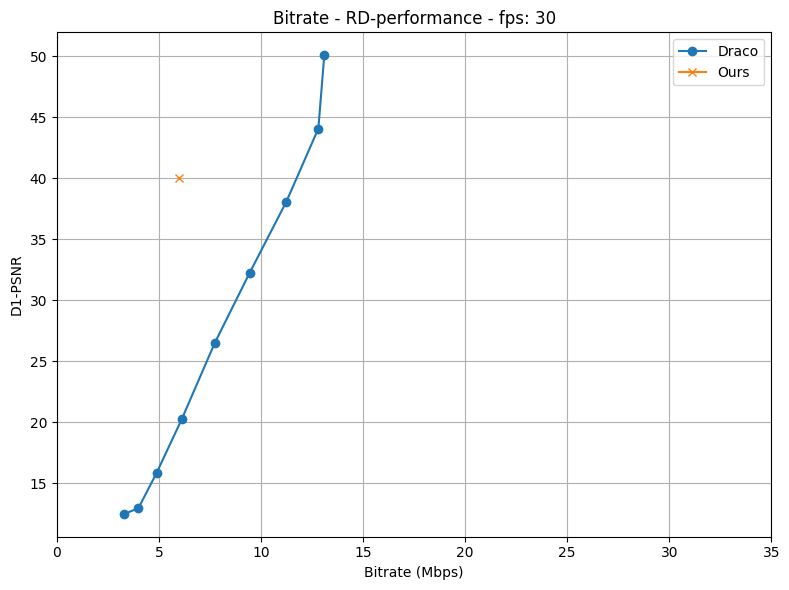

In [8]:
import matplotlib.pyplot as plt


Bitrates = [3.31, 3.99, 4.88, 6.13, 7.73, 9.44, 11.23, 12.81, 13.10]  
D1_PSNR = [12.50, 12.95, 15.83, 20.30, 26.48, 32.23, 38.03, 44.06, 50.07] 


ours_Bitrates = [6]  
ours_D1_PSNR = [40] 

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Bitrates, D1_PSNR, marker='o', label='Draco')
plt.plot(ours_Bitrates, ours_D1_PSNR, marker='x', label='Ours')
plt.title('Bitrate - RD-performance - fps: 30')
plt.xlabel('Bitrate (Mbps)')
plt.ylabel('D1-PSNR')
plt.grid(True)
plt.legend()  # Show legend with labels
plt.xlim(0, 35)
plt.tight_layout()

# Display the plot
plt.show()
